# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [289]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

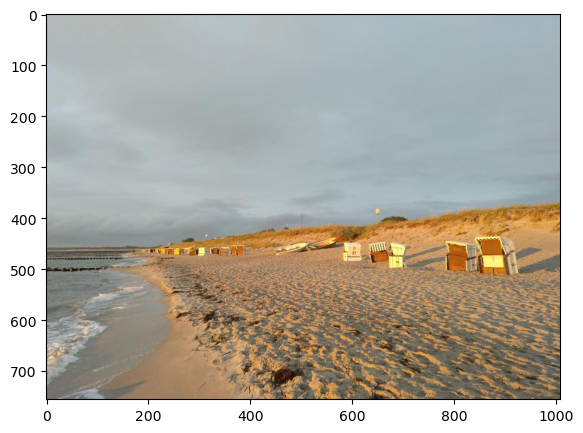

In [290]:
img = cv2.imread('data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

coeffs [1.01190476 1.05371901 2.00787402]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x20174621ac0>)

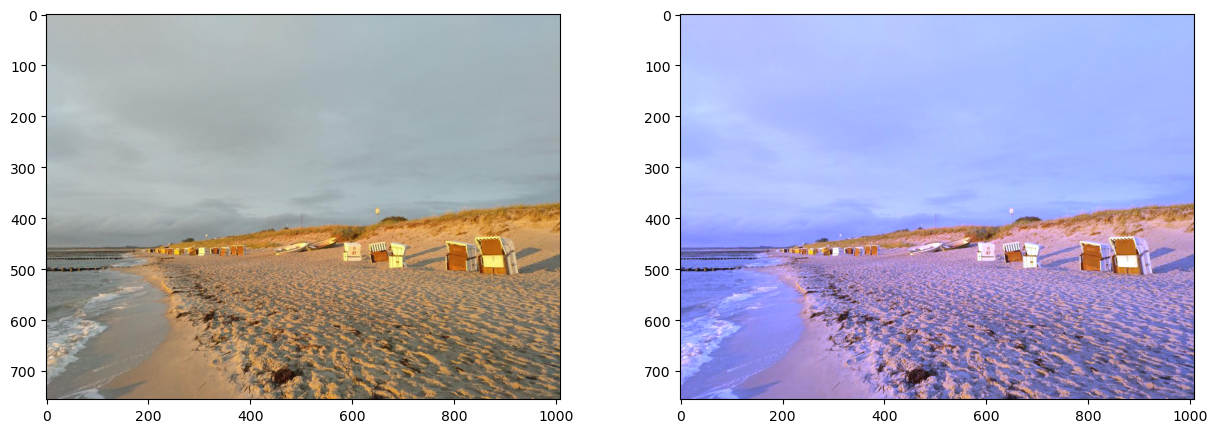

In [291]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white
print('coeffs', coeffs)

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

average red: 118.59373534583821
average red(manual): 118.59373534583821
average green: 124.89137968933177
average blue: 148.99135770808908 

my impl: 
 kr 0.7959772779451588 kg 0.8382457990216109 kb 1.0
0.46011309817498136
alternative impl: 
 kr 0.7199205017839617 kg 0.7187709840504137 kb 0.7167016694719738


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2018b34a9a0>)

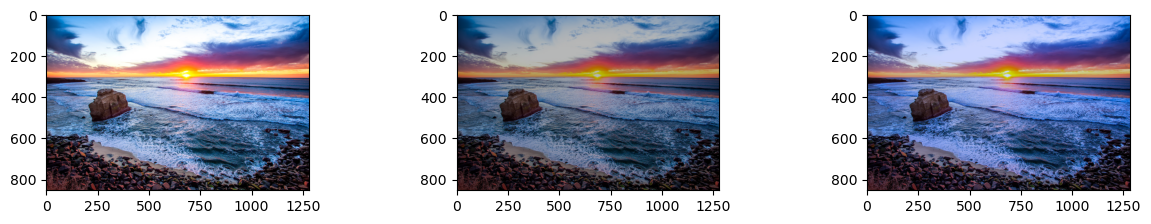

In [292]:
# Load your image
img_my = cv2.imread('data/sea_1.jpg')
img_my = cv2.cvtColor(img_my, cv2.COLOR_BGR2RGB)
plt.imshow(img_my)

# Compute the mean values for all three colour channels (red, green, blue)
red, green, blue = cv2.split(img_my)

# function to define mean value
def meanCalculation(arr):
    sum = 0
    count = 0
    for i in arr:
        count += len(i)
        sum += np.sum(i)
    return 0 if count == 0 else sum/count   

mean_r = np.mean(red)
print('average red:', mean_r)
mean_r_func = meanCalculation(red)
print('average red(manual):', mean_r_func)

mean_g = np.mean(green)
print('average green:', mean_g)

mean_b = np.mean(blue)
print('average blue:', mean_b ,'\n')

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

max_ligth_channel = np.max([mean_r, mean_g, mean_b])

kr = mean_r/(max_ligth_channel)
kg = mean_g/(max_ligth_channel)
kb = mean_b/(max_ligth_channel)
print('my impl:', '\n', 'kr', kr,'kg',kg,'kb', kb)

# Apply color balancing and generate the balanced image
coeffs_grey_world = [kr, kg, kb]
balanced = np.zeros_like(img_my, dtype=np.float32)

for channel in range(3):
    balanced[..., channel] = img_my[..., channel] * coeffs_grey_world[channel]
balanced = balanced/255
balanced[balanced > 1] = 1
       
# taken for comparison from https://cdmana.com/2021/03/20210324215604301i.html    
def grayworld(img):
    height,width = img.shape[:2]
    dst = np.zeros((height,width,3),dtype=np.float64)
    RGB = np.sum(img,axis=(1,2))
    RGB = np.divide(RGB,height*width)
    GrayValue = np.mean(RGB)
    print(GrayValue)
    
    kr = GrayValue / RGB[0]
    kg = GrayValue / RGB[1]
    kb = GrayValue / RGB[2]
    print('alternative impl:', '\n' ,'kr', kr,'kg',kg,'kb', kb)

    dst[:,:,0] = np.multiply(kb,img[:,:,0])
    dst[:,:,1] = np.multiply(kg,img[:,:,1])
    dst[:,:,2] = np.multiply(kr,img[:,:,2])
    dst = np.where(dst>255.0,255, dst).astype(np.uint8)
    return dst

# Show the original and the balanced image side by side
plt.subplot(231), plt.imshow(img_my)
plt.subplot(232), plt.imshow(grayworld(img_my))
plt.subplot(233), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

max pixel brightess: red 196 , green 196 , blue 196
coeficients for RGB [1.30102041 1.30102041 1.30102041]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x201a63507f0>)

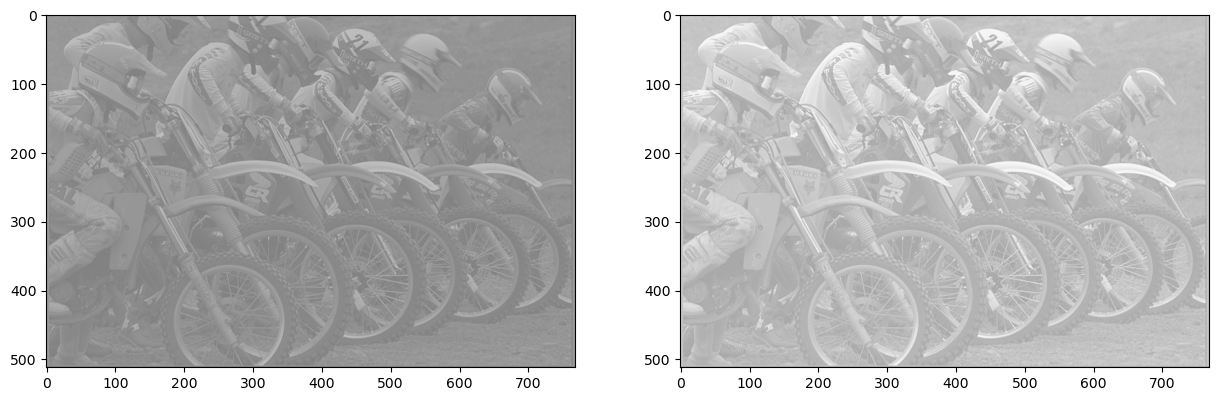

In [293]:
# Load your image
img = cv2.imread('data/kodim05.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:,:,0])
max_g = np.max(img[:,:,1])
max_b = np.max(img[:,:,2])
print('max pixel brightess:','red', max_r, ', green', max_g, ', blue', max_b)

coef = 255 / np.array([max_r, max_g, max_b])
print('coeficients for RGB', coef)

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)

for channel in range(3):
    balanced[..., channel] = img[..., channel] * (coef[channel])
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)